In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pollution = pd.read_csv('./../../data/visualization/pollution_wide.csv')

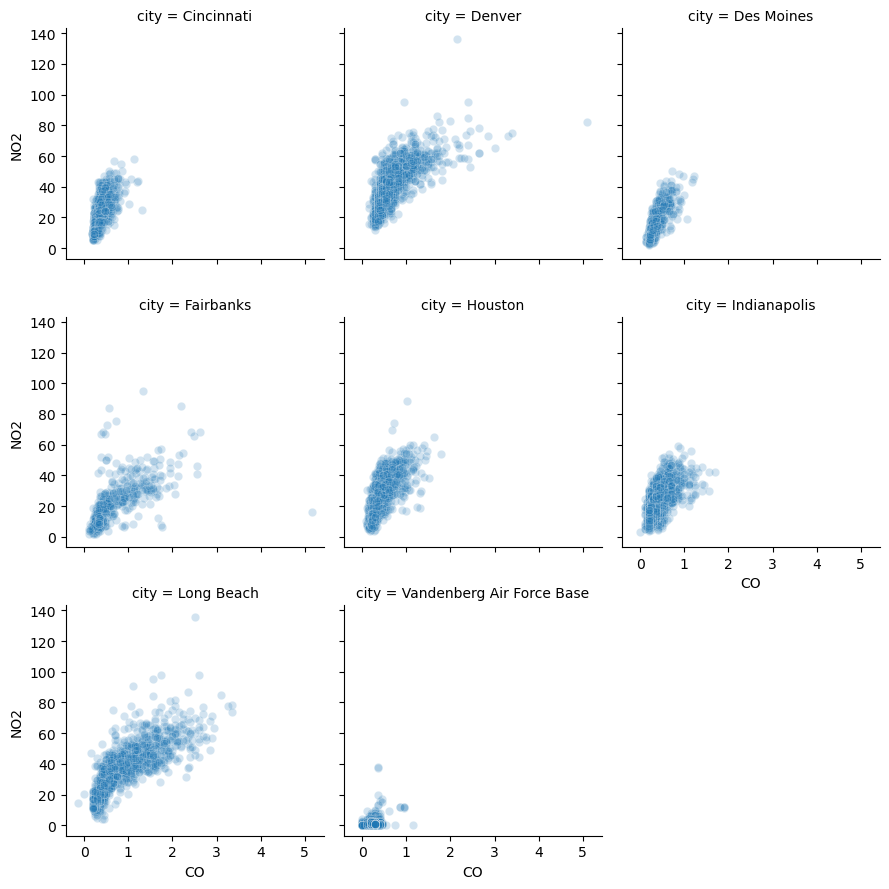

In [4]:
# Hard to read scatter of CO and NO2 w/ color mapped to city
# sns.scatterplot('CO', 'NO2',
#                 alpha = 0.2,
#                 hue = 'city',
#                 data = pollution)

# Setup a facet grid to separate the cities apart
g = sns.FacetGrid(data = pollution,
                  col = 'city',
                  col_wrap = 3)

# Map sns.scatterplot to create separate city scatter plots
g.map(sns.scatterplot, 'CO', 'NO2', alpha = 0.2)
plt.show()       

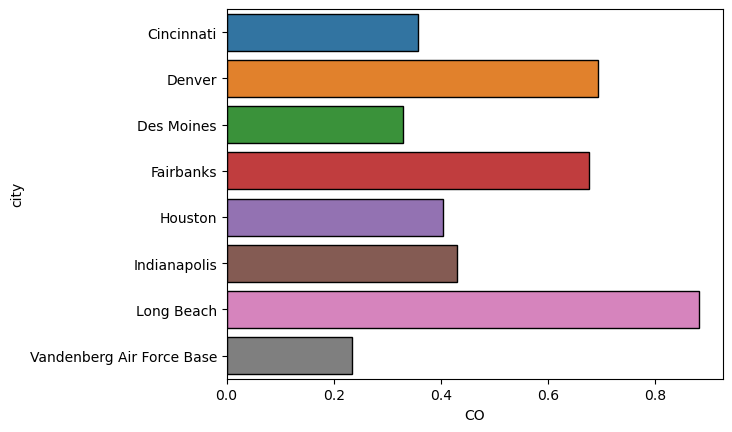

In [5]:
sns.barplot(y = 'city', x = 'CO', 
            estimator = np.mean,
            #ci = False, ## The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.
            errorbar=('ci', False),
            data = pollution,
            # Add a border to the bars
            edgecolor = 'black')
plt.show()

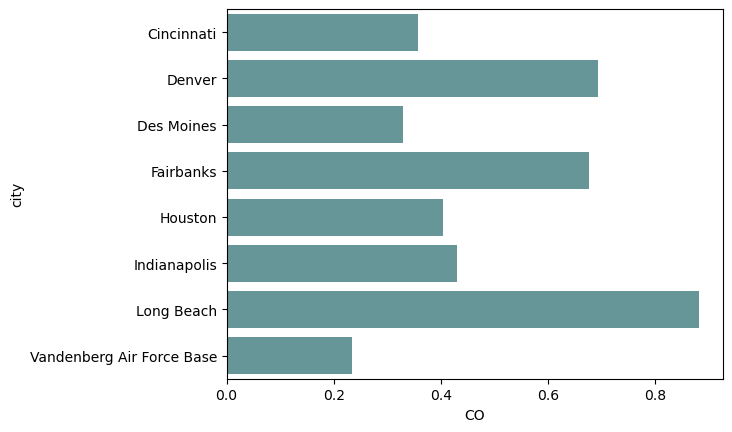

In [7]:
import numpy as np

sns.barplot(y = 'city', x = 'CO', 
            estimator = np.mean,
            #ci = False, ## The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.
            errorbar=('ci', False),
            data = pollution,
            # Replace border with bar colors
            color = 'cadetblue')
plt.show()

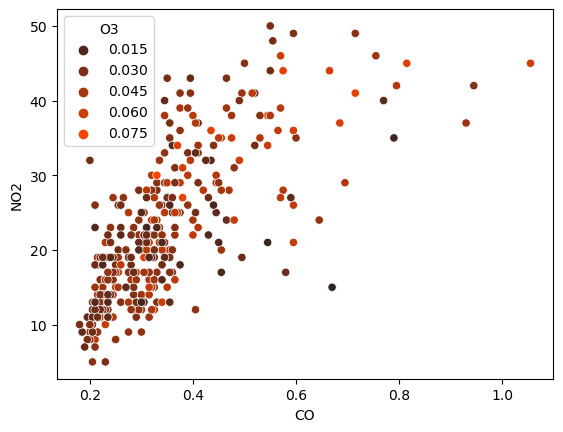

In [7]:
# Filter the data
cinci_2014 = pollution.query("city  ==  'Cincinnati' & year  ==  2014")

# Define a custom continuous color palette
color_palette = sns.dark_palette('orangered',
                         as_cmap = True)

# Plot mapping the color of the points with custom palette
sns.scatterplot(x = 'CO',
                y = 'NO2',
                hue = 'O3', 
                data = cinci_2014,
                palette = color_palette)
plt.show()

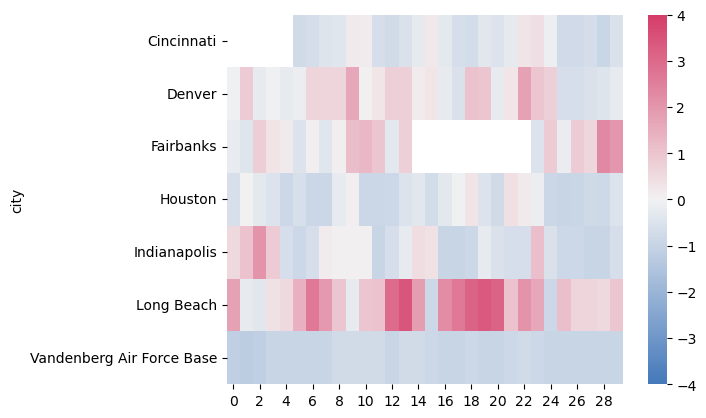

In [8]:
## input our dataframe
nov_2015_CO = pd.read_csv('./data/nov_2015_CO.csv', index_col=0)

# Define a custom palette
color_palette = sns.diverging_palette(250, 0, as_cmap = True)

# Pass palette to plot and set axis ranges
sns.heatmap(nov_2015_CO,
            cmap = color_palette,
            center = 0,
            vmin = -4,
            vmax = 4)
plt.yticks(rotation = 0)
plt.show()

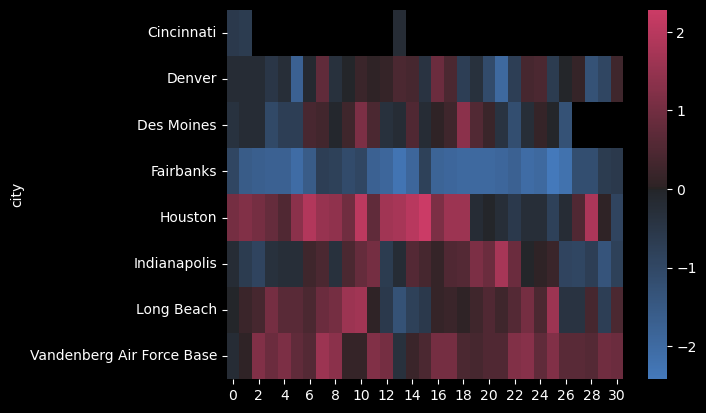

In [16]:
## input our dataframe
oct_2015_o3 = pd.read_csv('./data/oct_2015_o3.csv', index_col=0)

# Dark plot background
plt.style.use("dark_background")

# Modify palette for dark background
color_palette = sns.diverging_palette(250, 0,
                                      center = 'dark',
                                      as_cmap = True)

# Pass palette to plot and set center
sns.heatmap(oct_2015_o3,
            cmap = color_palette,
            center = 0)
plt.yticks(rotation = 0)
plt.show()

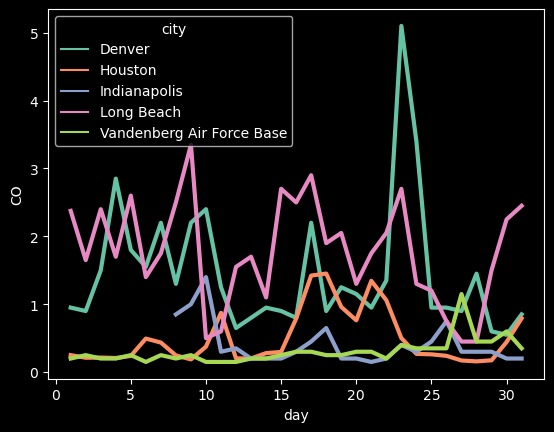

In [17]:
# Filter our data to Jan 2013
pollution_jan13 = pollution.query('year  ==  2013 & month  ==  1')

# Color lines by the city and use custom ColorBrewer palette
sns.lineplot(x = "day", 
             y = "CO", 
             hue = "city",
             palette = "Set2", 
             linewidth = 3,
             data = pollution_jan13)
plt.show()

In [21]:
city_pol_month = pd.read_csv('./data/city_pol_month.csv', index_col=0)

city_pol_month2 = pollution

print(city_pol_month.head())
print(city_pol_month2.head())

        city_pol  month     value color_cats
0  Cincinnati CO      2 -0.470791      other
1  Cincinnati CO      3 -0.371744      other
2  Cincinnati CO      4 -0.555778      other
3  Cincinnati CO      5 -0.496432      other
4  Cincinnati CO      6 -0.642432      other
         city  year  month  day     CO   NO2     O3    SO2
0  Cincinnati  2012      1    1  0.245  20.0  0.030   4.20
1  Cincinnati  2012      1    2  0.185   9.0  0.025   6.35
2  Cincinnati  2012      1    3  0.335  31.0  0.025   4.25
3  Cincinnati  2012      1    4  0.305  25.0  0.016  17.15
4  Cincinnati  2012      1    5  0.345  21.0  0.016  11.05


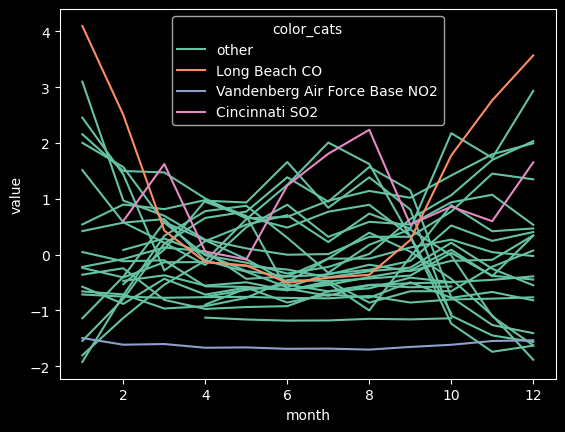

In [20]:
## input our dataframe
city_pol_month = pd.read_csv('./data/city_pol_month.csv', index_col=0)


# Choose the combos that get distinct colors
wanted_combos = ['Vandenberg Air Force Base NO2', 'Long Beach CO', 'Cincinnati SO2']

# Assign a new column to DataFrame for isolating the desired combos
city_pol_month['color_cats'] = [x if x in wanted_combos else 'other' for x in city_pol_month['city_pol']]

# Plot lines with color driven by new column and lines driven by original categories
sns.lineplot(x = "month",
             y = "value",
             hue = 'color_cats',
             units = 'city_pol',
             estimator = None,
             palette = 'Set2',
             data = city_pol_month)
plt.show()

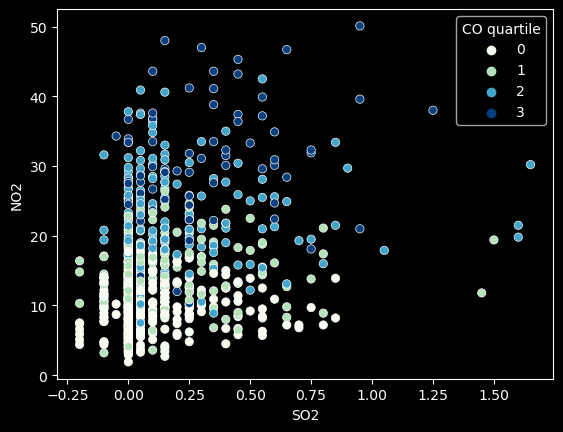

In [22]:
# Divide CO into quartiles
pollution['CO quartile'] = pd.qcut(pollution['CO'], q = 4, labels = False)

# Filter to just Des Moines
des_moines = pollution.query("city  ==  'Des Moines'")

# Color points with by quartile and use ColorBrewer palette
sns.scatterplot(x = 'SO2',
                y = 'NO2',
                hue = 'CO quartile', 
                data = des_moines,
                palette = 'GnBu')
plt.show()

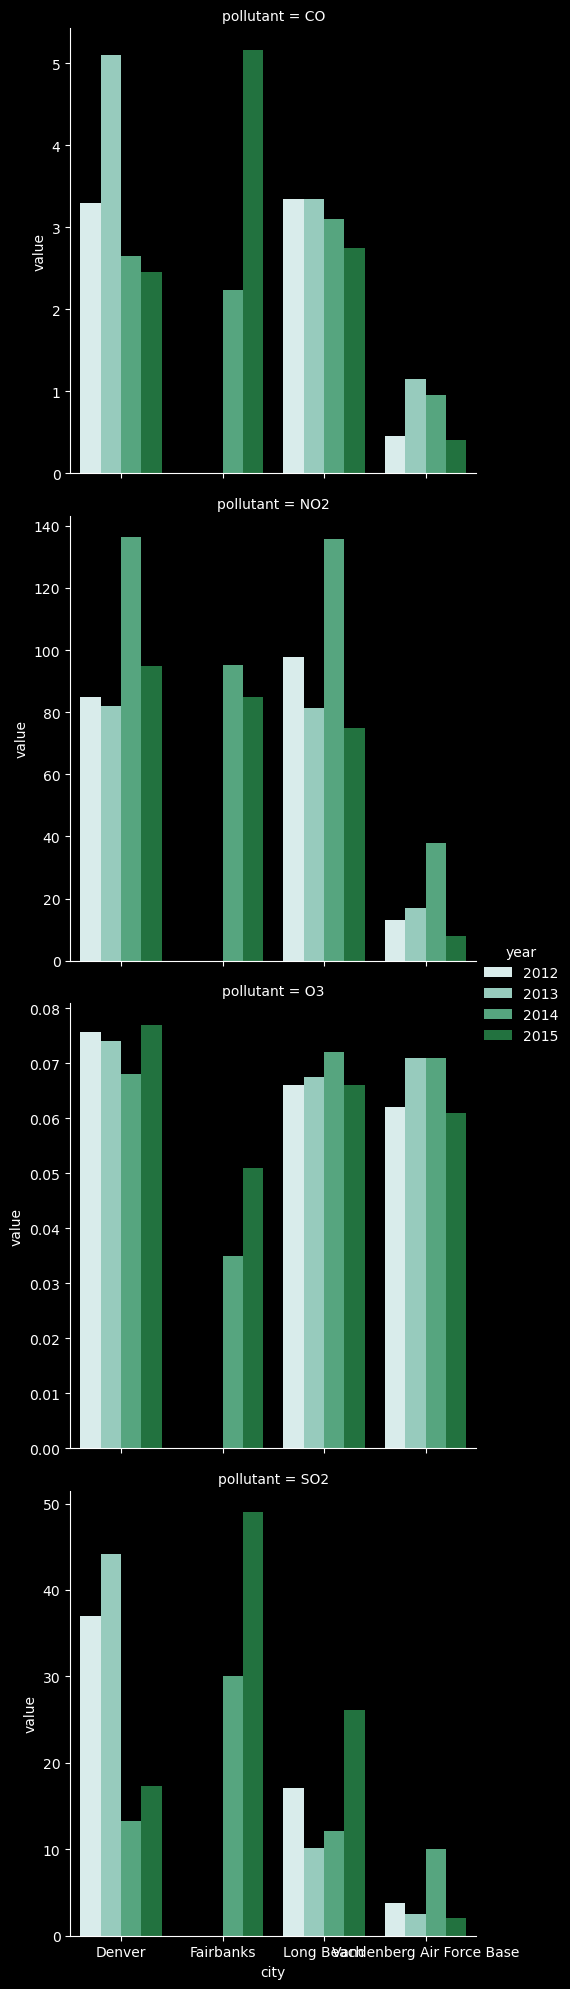

In [24]:
## input our dataframe
max_pollutant_values = pd.read_csv('./data/max_pollutant_values.csv', index_col=0)

# Reduce to just cities in the western half of US
cities = ['Fairbanks', 'Long Beach', 'Vandenberg Air Force Base', 'Denver']

# Filter data to desired cities
city_maxes = max_pollutant_values[max_pollutant_values.city.isin(cities)]

# Swap city and year encodings
sns.catplot(x = 'city', hue = 'year',
              y = 'value', row = 'pollutant',    
              # Change palette to one appropriate for ordinal categories
              data = city_maxes, palette = 'BuGn',
              sharey = False, kind = 'bar')
plt.show()